In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('assignment2_dataset.csv')

In [3]:
df.head()

,SN,YearsExperience,Salary
0,0,1.1,39343
1,1,1.3,46205
2,2,1.5,37731
3,3,2.0,43525
4,4,2.2,39891


In [4]:
df = df.drop('SN', axis=1)

In [5]:
df.shape

(30, 2)

In [6]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [9]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
df.duplicated().sum()

0

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


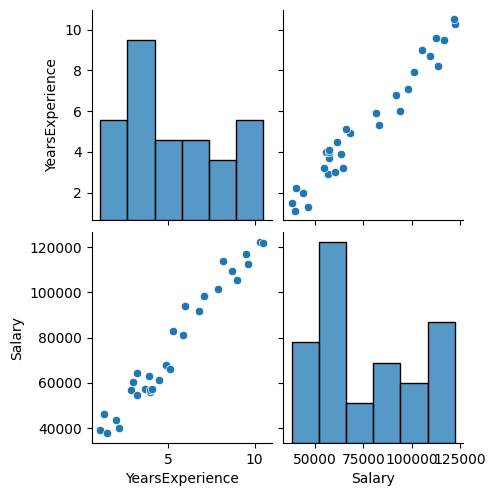

In [11]:
sns.pairplot(df)

<Axes: >

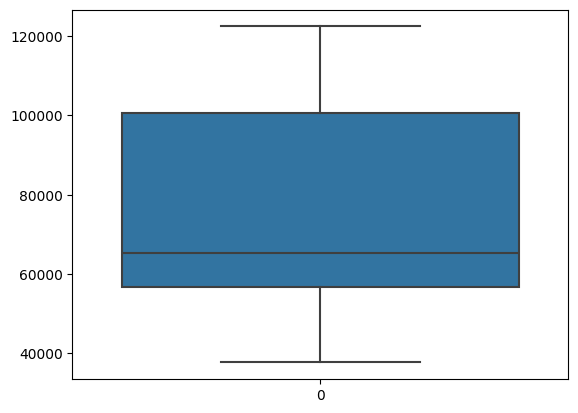

In [12]:
sns.boxplot(df['Salary'])

<Axes: >

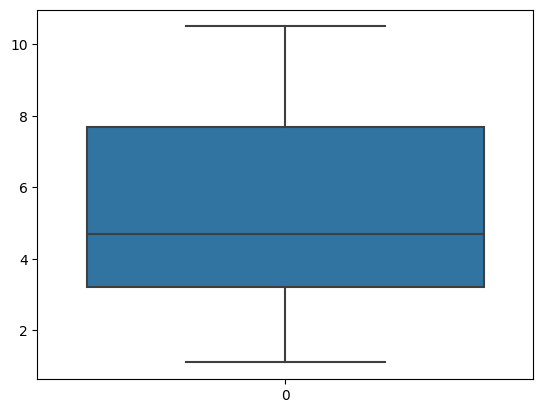

In [13]:
sns.boxplot(df['YearsExperience'])

Text(0, 0.5, 'Salary')

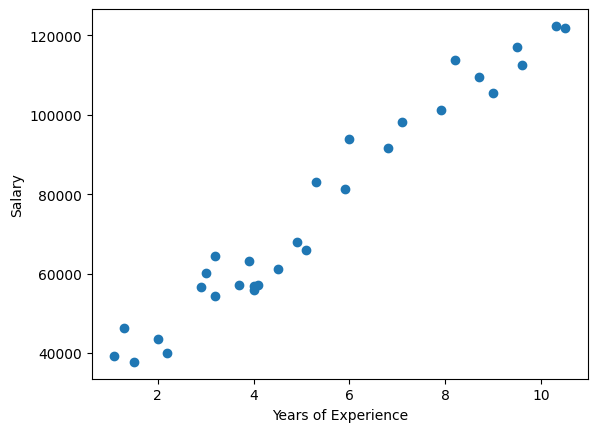

In [14]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [15]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [16]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [17]:
y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=2)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
X_test

,YearsExperience
1,1.3
0,1.1
14,4.5


In [23]:
y_test

1     46205
0     39343
14    61111
Name: Salary, dtype: int64

In [24]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37007.26618797])

Text(0, 0.5, 'Salary')

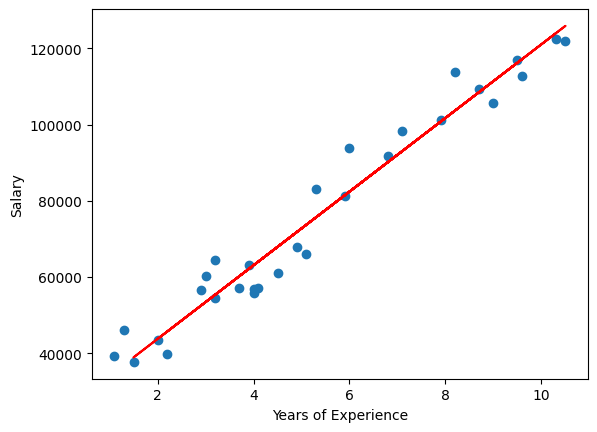

In [25]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.plot(X_train,lr.predict(X_train),color = 'red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [27]:
y_pred = lr.predict(X_test)

In [28]:
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  6759.367159215457


In [29]:
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error:  7052.718899905332


In [30]:
print("R2-Score: ",r2_score(y_test,y_pred))

R2-Score:  0.3975850893331776
